# Titanic Survival Prediction
## Project Objective
Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.
The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.

In [1]:
#import libraries

import matplotlib.pyplot as plt          
import seaborn as sb                       
import pandas as pd                        
import numpy as np

In [38]:
#import dataset
df = pd.read_csv('Titanic Survival Prediction.csv') 

In [39]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [18]:
df.shape      

(418, 12)

In [40]:
df.info()                         # gives the info about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [31]:
df.isnull().sum()           # null values in Age and Cabin

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [20]:
df.head(5)      # top 5 observations

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df.tail(5)       # last 5 observation

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [21]:
df.isnull().sum()    # Null Values in column Age and Cabin

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [43]:
df.dropna(subset=['Cabin'], inplace=True)

In [44]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            4
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [22]:
df.describe()        # gives the statistical summary of data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [23]:
df['Survived'].value_counts() # we can see the survival rate is very much low .

0    266
1    152
Name: Survived, dtype: int64

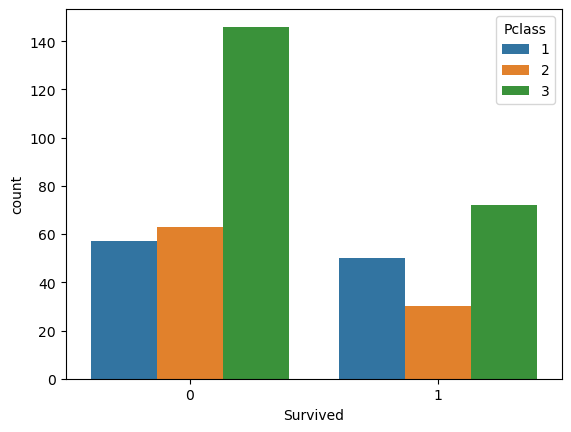

In [24]:
# Visualise Count of survival with Pclass

sb.countplot(x=df['Survived'],hue=df['Pclass'])
plt.show()

# from the graph we can see that 3rd class people has majority in non surviving category 
# as compared to 1st and 2nd class


In [26]:
df['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

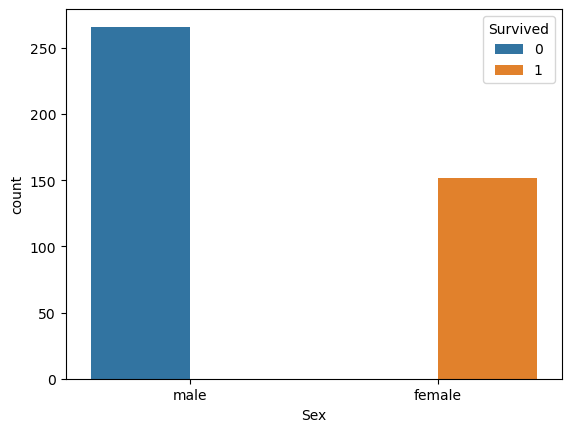

In [27]:
# count of survival of gender

sb.countplot(x=df['Sex'],hue=df['Survived'])
plt.show()

# above graph we can see that male has max number of count who has not survived as compare to female.

In [28]:
# survival rate by sex

df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,1.0
male,0.0


In [29]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Sex'] = labelencoder.fit_transform(df['Sex'])

df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


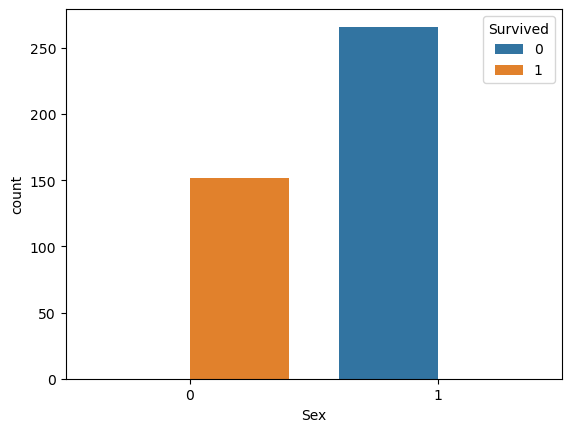

In [30]:
sb.countplot(x=df['Sex'],hue=df['Survived'])
plt.show()

C:\Users\91909\AppData\Local\Temp\ipykernel_24844\2564470479.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=40)


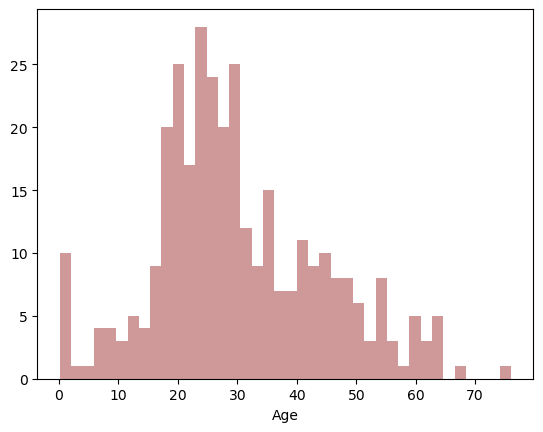

In [42]:
sb.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=40)
plt.show()

# age group of 17 to 30 max number of people young.

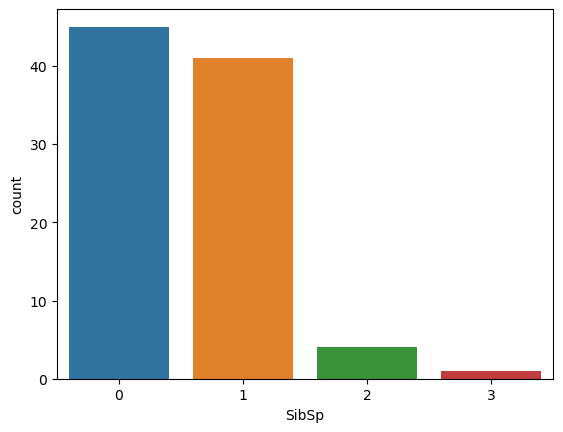

In [47]:
sb.countplot(x='SibSp',data=df)
plt.show()

<Axes: >

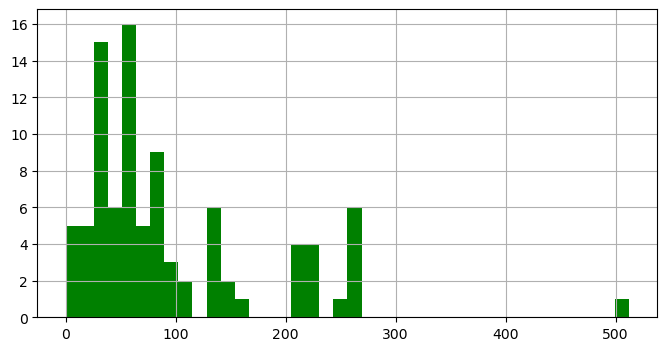

In [48]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [54]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [58]:
df.dropna(subset=['Age'], inplace=True)

In [59]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
28,920,0,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S


In [60]:
correlation_matrix = df.corr()

correlation_matrix

C:\Users\91909\AppData\Local\Temp\ipykernel_24844\3415491360.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.058260,0.004934,0.055488,-0.087828,-0.122551,-0.097346
Survived,-0.058260,1.000000,-0.056699,0.022983,0.170596,0.181554,0.179047
Pclass,0.004934,-0.056699,1.000000,-0.410924,-0.132790,0.006411,-0.298186
Age,0.055488,0.022983,-0.410924,1.000000,0.062530,0.051144,0.180567
SibSp,-0.087828,0.170596,-0.132790,0.062530,1.000000,0.252194,0.213014
Parch,-0.122551,0.181554,0.006411,0.051144,0.252194,1.000000,0.395685
Fare,-0.097346,0.179047,-0.298186,0.180567,0.213014,0.395685,1.000000


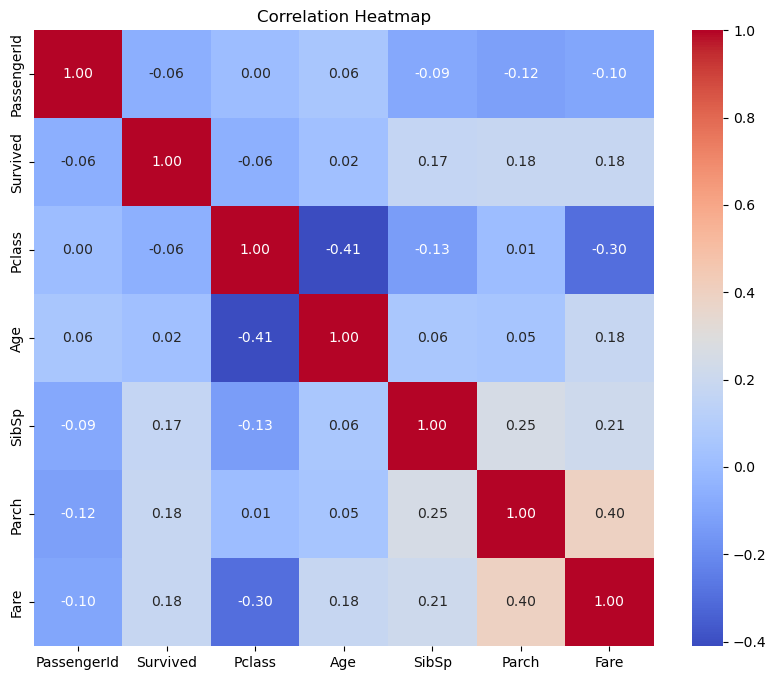

In [61]:
# Multivariate Analysis


plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



#passengers in higher classes tended to pay more for their tickets and travel with more family members.

#following features are strongly correlated with survival:
#Sex (-0.54)
#Pclass (-0.34)
#Fare (0.26)

#These correlations indicate that women, passengers in higher classes, and passengers 
#who paid more for their tickets were more likely to survive the Titanic disaster.

#This suggests that older passengers were slightly less likely to survive than younger passengers.

#passengers who were traveling with family members were slightly more likely to survive.

#passengers who were traveling with young children were slightly more likely to survive.

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 12 to 414
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  87 non-null     int64  
 1   Survived     87 non-null     int64  
 2   Pclass       87 non-null     int64  
 3   Age          87 non-null     float64
 4   SibSp        87 non-null     int64  
 5   Parch        87 non-null     int64  
 6   Fare         87 non-null     float64
 7   Cabin        87 non-null     object 
 8   male         87 non-null     uint8  
 9   Q            87 non-null     uint8  
 10  S            87 non-null     uint8  
 11  male         87 non-null     uint8  
 12  Q            87 non-null     uint8  
 13  S            87 non-null     uint8  
dtypes: float64(2), int64(5), object(1), uint8(6)
memory usage: 6.6+ KB


In [109]:
Cabin = pd.get_dummies(df['Cabin'],drop_first=True)

In [134]:
df.drop(['Sex'],axis=1,inplace=True)

In [135]:
# Train test split
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
12,904,1,1,23.0,1,0,82.2667
14,906,1,1,47.0,1,0,61.1750
24,916,1,1,48.0,1,3,262.3750
26,918,1,1,22.0,0,1,61.9792
28,920,0,1,41.0,0,0,30.5000


In [136]:
df['Survived'].head()

12    1
14    1
24    1
26    1
28    0
Name: Survived, dtype: int64

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
x_train , x_test , y_train , y_test = train_test_split(df.drop('Survived',axis=1),
                                                      df['Survived'],test_size=0.30,
                                                       random_state=101)

In [ ]:
# Training and Predicting

In [139]:
from sklearn.linear_model import LogisticRegression

In [140]:
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

C:\Users\Public\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [141]:
predictions = logmodel.predict(x_test)

In [142]:
from sklearn.metrics import confusion_matrix

In [143]:
accuracy=confusion_matrix(y_test,predictions)

In [144]:
accuracy

array([[ 6,  6],
       [11,  4]], dtype=int64)

In [145]:
from sklearn.metrics import accuracy_score

In [146]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.37037037037037035

In [147]:
predictions

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0], dtype=int64)

In [ ]:
# Evaluation

In [148]:
from sklearn.metrics import classification_report

In [149]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.35      0.50      0.41        12
           1       0.40      0.27      0.32        15

    accuracy                           0.37        27
   macro avg       0.38      0.38      0.37        27
weighted avg       0.38      0.37      0.36        27

